In [ ]:
from __future__ import print_function

from intervaltree import IntervalTree, Interval
from collections import defaultdict
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.__version__
%matplotlib inline
import screed


In [ ]:
def overlap_intervals(self, other):
    splits = (self | other)
    splits.split_overlaps()
    self_int_other = IntervalTree(filter(lambda r: self.overlaps(r) and other.overlaps(r), splits))
    return self_int_other


def overlap_all(trees):
    if len(trees) in (0, 1):
        return None

    overlap = overlap_intervals(trees[0], trees[1])
    for t in trees[2:]:
        overlap = overlap_intervals(overlap, t)
    overlap.merge_overlaps(data_reducer)

    return overlap


def data_reducer(current_data, new_data):
    return current_data | new_data

     

In [ ]:
gtrees = defaultdict(dict)
all_genes = set()
files = defaultdict(lambda: defaultdict(list))

In [ ]:
for f in ('vqc', 'iqc', 'sqc', 'mqc'):
    for line in open(f): 
            x = line.rstrip().split(' ')
            if x[2] != 'Extensive':  
                files[f][x[14]].append((int(x[3]), int(x[4])))
print (x)

In [ ]:
gtrees = defaultdict(dict)
all_genes = set()
for f in files:
    for g in files[f]:
        all_genes.add(g)
        gtrees[g][f] = IntervalTree(Interval(iv[0], iv[1], set([f]))
                                    for iv in files[f][g])
        
        print (g)

In [ ]:
overlap_trees = {}
for gene in all_genes:
    overlap_trees[gene] = overlap_all(list(gtrees[gene].values()))
    if overlap_trees[gene]:
        print('@', gene, end=": \n ")
        print(overlap_trees[gene]) 
"""       
overlap_trees['Desulfovibrio_vulgaris_DP4'].remove_envelop(0, 179544)
overlap_trees['Desulfovibrio_vulgaris_DP4'].remove_overlap(0, 179544)   
for i in overlap_trees['Desulfovibrio_vulgaris_DP4']:
      print(i)
""" 
print ('done')

In [ ]:
#out=open('case', 'a')
#for i in overlap_trees['Enterococcus_faecalis_V583']:
   #       print(i,file=out)


@ Clostridium_thermocellum_ATCC_27405 : 2003160 , 2010929 2
@ Caldisaccharolyticus_DSM_8903 : 520488 , 1609657 6
@ Geobacter_sulfurreducens_PCA : 2015315 , 3543539 7
@ Enterococcus_faecalis_V583 : 17366 , 3218031 70
@ Burkholderia1_xenovorans_LB400_chromosome_1__complete_sequence : 168126 , 784099 3
@ Chlorobiumphaeovibrioides_DSM_265 : 1929914 , 1930267 1
@ Sulfurihydrogenibium_yellowstonense_SS-5 : 883 , 1524768 22
@ Caldibescii_DSM_6725 : 2803730 , 2803948 1
@ Pyrococcus_furiosus_DSM_3638 : 275668 , 1903011 11
@ Akkermansia_muciniphila_ATCC_BAA-835 : 512001 , 2610978 7
@ Nostoc_sp._PCC_7120_DNA : 1273737 , 1292767 2
@ Herpetosiphon_aurantiacus_ATCC_23779 : 4123453 , 4123507 1
@ Bacteroides_thetaiotaomicron_VPI-5482 : 6000673 , 6060083 1
@ Deinococcus_radiodurans_R1_chromosome_1__complete_sequence : 1 , 3060986 3
@ Sulfolobus_tokodaii_str._7_DNA__complete_genome : 2240715 , 2269526 1
@ Porphyromonas_gingivalis_ATCC_33277_DNA : 1449250 , 1492705 2
@ Bordetella_bronchiseptica_strain_RB

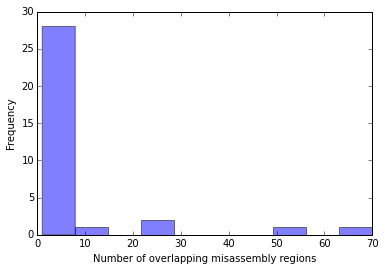

In [97]:
cutoff =2
out =open('case','w+')
overlap_trees = {}
dist ={}
for gene in all_genes:
            overlap_trees[gene] = overlap_all(list(gtrees[gene].values()))
            if overlap_trees[gene]:
                    print('@',gene,":",overlap_trees[gene].begin( ),",",overlap_trees[gene].end(), len(overlap_trees[gene])) 
                    dist[gene]=len(overlap_trees[gene])
                    if len(overlap_trees[gene]) >cutoff:
                            for i in overlap_trees[gene]:
                                    print(gene,',',i,',',file=out)

                        
s  = pd.Series(dist,index=dist.keys())
s.plot(kind='hist', stacked=True, alpha=0.5)#,bins=10)
plt.xlabel('Number of overlapping misassembly regions')
plt.ylabel('Frequency')
#plt.figure()
plt.savefig('misassambly-figure.png') 
print ('done')                


In [96]:
common_genomes =set()
#parse case files
gdict=defaultdict(list)
input=open('case','r')
for line in input:
        line=line.split(',')
        #print(line)
        gene=line[0]
        x=line[1].split('(')
        x=x[1]
        y=line[2]
        #print(x,"-",y)
        gdict[line[0]].append(x)
        gdict[line[0]].append(y)

for g in gdict.keys(): 
         i=1
         l=len(gdict[g])
         print (l)
         min =20700000
         max =-1
         sum=0
         while(i <l-1) :
                gap=abs( int(gdict[g][i+1]) -int(gdict[g][i]) )
                sum+=gap
                if min >gap: 
                        min=gap
                if max <gap:
                        max=gap
                i=i+2
         #print(g,"has ",l/2,"misassemblies with min/max/average gaps:",str(min), "/",str(max),"/",(sum/l))
         common_genomes.add(g)
for g in common_genomes: 
         print ('Shouldnt be printed: ', g) 
fout =open('filtered2_reference.fa','w+')
for record in screed.open('mircea.fa'):
       
        if record.name.split()[0] in common_genomes:  
                 continue 
        else: 
                    #print ('printed to file: ' ,record.name.split()[0] )
                    print(">",record.name.split()[0], file=fout)
                    print(record.sequence, file=fout)
print('done')

14
8
22
6
140
52
14
14
44
94
12
8
6
Shouldnt be printed:  Sulfitobacter_NAS-14.1_scf_1099451320477_ 
Shouldnt be printed:  Archaeoglobus_fulgidus_DSM_4304 
Shouldnt be printed:  Pyrococcus_furiosus_DSM_3638 
Shouldnt be printed:  Deinococcus_radiodurans_R1_chromosome_1__complete_sequence 
Shouldnt be printed:  Enterococcus_faecalis_V583 
Shouldnt be printed:  Desulfovibrio_vulgaris_DP4 
Shouldnt be printed:  Akkermansia_muciniphila_ATCC_BAA-835 
Shouldnt be printed:  Geobacter_sulfurreducens_PCA 
Shouldnt be printed:  Sulfurihydrogenibium_yellowstonense_SS-5 
Shouldnt be printed:  Thermus_thermophilus_HB27 
Shouldnt be printed:  Caldisaccharolyticus_DSM_8903 
Shouldnt be printed:  Nitrosomonas_europaea_ATCC_19718 
Shouldnt be printed:  Burkholderia1_xenovorans_LB400_chromosome_1__complete_sequence 
done
